In [1]:
import requests
import pandas as pd
import numpy as np
import json
import urllib

In [2]:
def places_search(term,street, zipcode):
    dict = {"near": zipcode,
            "address": street,
            "query" :term,
            #"intent":"match",
            "zip":zipcode,
            "limit":1,
            "client_id" : "E2WO1HFNFDZXXPOC55332FQTAYPB1SS5W4WLMWHGJPWQKGPO",
            "client_secret" : "QUYG5NPQADQDHE4ACBMFWD4Y1NWXU2JG0KKWHOSNZVWR2LDQ",
            "v" : "20181122"
           }
    params =urllib.parse.urlencode(dict)
    url = "https://api.foursquare.com/v2/venues/search?"+params
    resp = requests.get(url)
    #grabbing the JSON result
    data = json.loads(resp.text)
    
    return data


In [121]:
resp = requests.get("https://api.foursquare.com/v2/venues/search?near=11201&address=FURMAN+ST&query=1+HOTEL+BROOKLYN+BRIDGE&zip=11201&limit=1&client_id=E2WO1HFNFDZXXPOC55332FQTAYPB1SS5W4WLMWHGJPWQKGPO&client_secret=QUYG5NPQADQDHE4ACBMFWD4Y1NWXU2JG0KKWHOSNZVWR2LDQ&v=20181122")
data = json.loads(resp.text)
print(jsonData["response"]["venues"][0]["categories"])

[{'id': '4bf58dd8d48988d146941735', 'name': 'Deli / Bodega', 'pluralName': 'Delis / Bodegas', 'shortName': 'Deli / Bodega', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/deli_', 'suffix': '.png'}, 'primary': True}]


In [ ]:
df_restaurant = pd.read_csv("restaurants_raw_data_foursquare.csv")
count =1
#df_restaurant["searched_foursquare"] = False
df_restaurant = df_restaurant.sort_values(by=['searched_foursquare',"dba"],ascending = True)
print(len(df_restaurant))
print(len(df_restaurant[df_restaurant["searched_foursquare"] == True ]))


for restau in df_restaurant.index[0:10000]:
    if df_restaurant.loc[restau,"searched_foursquare"] == False:
        jsonData = places_search(str(df_restaurant.loc[restau,"dba"]),str(df_restaurant.loc[restau,"street"]),str(df_restaurant.loc[restau,"zipcode"].astype(int)))
        try:
            df_restaurant.loc[restau,"foursquare_id"] = jsonData["response"]["venues"][0]["id"]
            df_restaurant.loc[restau,"foursquare_name"] = jsonData["response"]["venues"][0]["name"]
            df_restaurant.loc[restau,"foursquare_address"] = jsonData["response"]["venues"][0]["location"]["address"]
            df_restaurant.loc[restau,"foursquare_lat"] = jsonData["response"]["venues"][0]["location"]["lat"]
            df_restaurant.loc[restau,"foursquare_lng"] = jsonData["response"]["venues"][0]["location"]["lng"]
            df_restaurant.loc[restau,"foursquare_category_id"] = jsonData["response"]["venues"][0]["categories"][0]["id"]
            df_restaurant.loc[restau,"foursquare_category_name"] = jsonData["response"]["venues"][0]["categories"][0]["name"]
            print(count,str(df_restaurant.loc[restau,"dba"]),jsonData["response"]["venues"][0]["name"])
        except:
            print("Foursquare couldn't find!")
        df_restaurant.loc[restau,"searched_foursquare"] = True
        count = count +1    
        df_restaurant.to_csv("restaurants_raw_data_foursquare.csv",index=False)

26817
2266
1 BEST FUZHOU RESTAURANT Best Fuzhou
2 BEST GARDEN CHINESE RESTAURANT Best Garden Chinese Restaurant
3 BEST ITALIAN PIZZA Best Italian Pizza
4 BEST ITALIAN PIZZA Best Italian Pizza
5 BEST JOY SIANG RESTAURANT Joy Siang
Foursquare couldn't find!
7 BEST LUNCHEONETTE Best Luncheonette
8 BEST OF THE BEST DELICATESSEN Best of the Best Delicatessen
9 BEST PIZZA Best Pizza
10 BEST PIZZA Best Pizza
11 BEST PIZZA ON 1ST. Best Pizza
12 BEST WESTERN CONVENTION CENTER Best Western Convention Center Hotel
13 BEST WESTERN GREGORY HOTEL Best Western Gregory Hotel
14 BEST WESTERN HOTEL HOSPITALITY HOUSE Best Western Plus Hospitality House
15 BEST WESTERN PREMIER HERALD SQUARE Best Western Premier Herald Square
16 BEST WINGERS Best Wingers
17 BEST WINGERS Best Wingers
18 BEST WOK CHINESE FOOD Best Wok Chinese Restaurant
19 BEST WOK FLATBUSH Best Wok Chinese Restaurant
20 BEST-BITES RESTAURANT & BAKERY Best Bites
Foursquare couldn't find!
Foursquare couldn't find!
23 BETTER BEING Better Body 

220 BLACK RABBIT BAR Black Rabbit
221 BLACK ROCK CAFE Hard Rock Cafe New York
222 BLACK SEED BAGEL Black Seed Bagels
223 BLACK SEED BAGELS Black Seed Bagels
224 BLACK SEED BAGELS Black Seed Bagels
225 BLACK SEED BAGELS Black Seed Bagels
Foursquare couldn't find!
227 BLACK STAR BAKERY & CAFE Black Star Bakery
Foursquare couldn't find!
229 BLACK SWAN The Black Swan
230 BLACK TAP Black Tap
231 BLACK TAP Black Tap
232 BLACK TAP LES Black Tap
233 BLACK THAI Black Thai
234 BLACKBARN CAFE & BAR Love Cafe and Bar
235 BLACKBIRD'S New York Penn Station
236 BLACKOUT LOUNGE Black Out Lounge
237 BLACKSTAR BAKERY CAFE Bouchon Bakery & Cafe
238 BLACKSTONE  BAR AND GRILL Blackstone Bar & Grill
239 BLACKTHORN 51 Blackthorn 51
240 BLACKWELLS Blackwell's
241 BLAGGARD'S PUB Blaggards Pub
242 BLAKE & TODD Blake & Todd
243 BLAKE & TODD Blake & Todd
244 BLAKE AND TODD Blake & Todd
245 BLAKE BAKERY & TAKE OUT FOOD Blake Bakery and Take Out
246 BLAKE LANE Bluestone Lane
247 BLAKE'S INTERNATIONAL RESTAURANT Bla

439 BOBBY VAN'S Bobby Van's Steakhouse
440 BOBBY VAN'S GRILL Bobby Van's
441 BOBBY VAN'S GRILL Bobby Van's Steakhouse
442 BOBBY VAN'S GRILL Bobby Van's Steakhouse
443 BOBBY VAN'S STEAKHOUSE Bobby Van's Steakhouse
444 BOBBY VAN'S STEAKHOUSE Bobby Van's Steakhouse
445 BOBBY VAN'S STEAKHOUSE C.P.S Bobby Van's Steakhouse
446 BOBO RESTAURANT Bobo
447 BOBO'S SMOOTHIES Hawa Smoothies & Bubble Tea
448 BOBWHITE COUNTER Bobwhite Counter
449 BOBWHITE COUNTER. Bobwhite Counter
450 BOBWHITE LUNCH AND SUPPER COUNTER Bob White Lunch & Supper Counter
451 BOCA CHICA QUEENS Boca Chica Restaurant
452 BOCA CHICA SEAFOOD Boca Chica Seafood Restaurant
453 BOCA JUNIORS STEAKHOUSE Boca Juniors Argentine Steakhouse
454 BOCA RESTAURANT & STEAK HOUSE Boca Restaurant And Lounge
Foursquare couldn't find!
456 BOCADO CAFE Bocado Café
457 BOCAITO CAFE & WINE BAR Bocaito Cafe & Wine Bar
458 BOCBOC CHICKEN DELICIOUS BocBoc Chicken Delicious
459 BOCCA Bocca Restaurant
460 BOCCA Bocca Restaurant
461 BOCCA BLISS Bocca Bli

667 BRASSERIE SEOUL Brasserie Séoul
668 BRASSERIE TOAST CAFE Brasserie Cafe Creme
Foursquare couldn't find!
670 BRAVEN BREWING COMPANY Braven Brewing Company
671 BRAVEST Bravest on 38th
672 BRAVI RAGAZZI BK Bravi Ragazzi
673 BRAVO AFRICAN RESTAURANT Fouta African/American Restaurant
Foursquare couldn't find!
675 BRAVO KOSHER PIZZA Bravo Kosher Pizza
676 BRAVO KOSHER PIZZA/BRAVO KOSHER BURGER Bravo Kosher Downtown
677 BRAVO PIZZA Bravo Pizza
678 BRAVO PIZZA Bravo Pizza
679 BRAVO PIZZA Bravo Pizza
680 BRAVO PIZZA Bravo Pizza
681 BRAVO'S RESTAURANT &  CAFE Tasty Restaurant & Cafe
682 BRAZEN FOX KITCHEN AND BAR The Brazen Fox
683 BRAZIL BRAZIL RESTUARANT Brazil Brazil Churrascaria
684 BRB CAFE Beach Cafe
685 BREAD & BUTTER Bread & Butter
686 BREAD & BUTTER Bread & Butter
687 BREAD & BUTTER Bread & Butter
688 BREAD & BUTTER Bread & Butter
689 BREAD & BUTTER Bread & Butter
690 BREAD & BUTTER Bread & Butter
691 BREAD & JOE Bread and Joe
692 BREAD & SPREAD Bread & Spread


In [158]:
df_google = pd.read_csv("restaurants_raw_data_google.csv")
df_restaurant = pd.read_csv("restaurants_raw_data.csv")
df_google = df_google.drop_duplicates(["dba","street","zipcode"])
for col in df_google.columns:
    if col == "searched":
        df_google = df_google.drop(col,axis=1)
    if "yelp" in col:
        df_google = df_google.drop(col,axis=1)
df_merged = df_restaurant.merge(df_google, on=["dba","street","zipcode"],how="left",suffixes=('', '_y'))
df_restaurant = df_restaurant.sort_values(by=['searched'],ascending = True)
print(len(df_google))
print(len(df_restaurant))
print(len(df_merged))
#df_merged.to_csv("restaurants_raw_data_merged.csv")

    

7512
26817
26817
                                                     dba  \
0                                                    NaN   
1                                      THE BLUEBELL CAFE   
2                                         THE BLUE STOVE   
3                                         THE BLUE GOOSE   
4                                  THE BLOND/THE LIBRARY   
5                         THE BLESSED KITCHEN EXPERIENCE   
6                     THE BLARNEY STONE PUB & RESTAURANT   
7                                        THE BLACK WHALE   
8                                        THE BLACK SHEEP   
9                                     THE BLACK FLAMINGO   
10                                            THE BODEGA   
11                                       THE BLACK DERBY   
12     THE BISTRO AT THE COURTYARD & RESIDENCE INN BY...   
13                            THE BISTRO (HBO CAFETERIA)   
14                                            THE BISTRO   
15                     

In [2]:
import pandas as pd
df = pd.read_csv("raw_data.csv")
df_restaurant = pd.read_csv("restaurants_raw_data.csv")
#Keeping only one record for each restaurant
df["inspection_date_datetime"] = pd.to_datetime(df["inspection_date"])
df = df.sort_values("inspection_date_datetime",ascending=False)
df = df.drop_duplicates("camis")
df = df[df["grade"].notnull()]
df_restaurant = df_restaurant.drop_duplicates(["dba","street","zipcode"])
df_merged = df.merge(df_restaurant, on=["dba","street","zipcode"],how="left")
df_for_map = df_merged[df_merged["yelp_latitude"].notnull()]
df_map = df_for_map

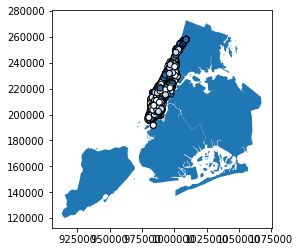

In [68]:
import geopandas
import matplotlib.pyplot as plt
from shapely.geometry import Point
import os
os.environ["PROJ_LIB"] = "C:\ProgramData\Anaconda3\Library\share"
df_map = df_for_map[["score","yelp_latitude","yelp_longitude"]]
df_map = df_map[(df_map["yelp_longitude"] >= -74.257159) & (df_map["yelp_longitude"]  <= -73.699215)]
df_map = df_map[(df_map["yelp_latitude"] >= 40.495992) & (df_map["yelp_latitude"]  <= 40.915568)]
df_map['Coordinates'] = list(zip(df_map.yelp_longitude, df_map.yelp_latitude))
df_map['Coordinates'] = df_map['Coordinates'].apply(Point)

df =df_map[["score","Coordinates"]]
gdf = geopandas.GeoDataFrame(df, geometry='Coordinates')
gdf.crs = {'init': 'epsg:4326', 'no_defs': True}
nybb_path = geopandas.datasets.get_path('nybb')
boros = geopandas.read_file(nybb_path)
gdf.to_crs(boros.crs, inplace=True)
manhattan = boros.geometry[3]
brooklyn = boros.geometry[2]
in_mn = gdf.geometry.within(manhattan)
ax = boros.plot()
gdf[in_mn].plot(ax=ax,column="score",edgecolor='black', scheme='quantiles',cmap='Blues')
plt.show()

In [61]:
df_map


,score,yelp_latitude,yelp_longitude,Coordinates
7,13.0,40.669172,-73.986665,POINT (-73.986665 40.669172)
8,12.0,40.643211,-73.781952,POINT (-73.781952 40.643211)
10,37.0,40.768437,-73.982779,POINT (-73.98277874603271 40.7684372199907)
14,36.0,40.825337,-73.982910,POINT (-73.98290991783141 40.8253370864609)
20,4.0,40.856135,-73.856100,POINT (-73.8561 40.85613499999999)
25,12.0,40.584317,-73.820575,POINT (-73.82057500000001 40.584317)
46,7.0,40.690851,-73.813809,POINT (-73.81380937993529 40.69085130354171)
47,11.0,40.756077,-73.881273,POINT (-73.88127330690621 40.7560766643757)
50,23.0,40.743844,-73.910833,POINT (-73.91083299206541 40.7438437425871)
62,9.0,40.745304,-73.903193,POINT (-73.90319289999999 40.74530410000001)


In [187]:
import gmplot
print(df_map.index[0])
gmap = gmplot.GoogleMapPlotter(df_map.loc[df_map.index[0],"yelp_latitude"],df_map.loc[df_map.index[0],"yelp_longitude"],10)
gmap.heatmap(df_map['yelp_latitude'], df_map['yelp_longitude'])
gmap.draw('incidents3.html')

6


In [197]:
scl = [ [0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
    [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"] ]

data = [ dict(
        type = 'scattergeo',
        locationmode = 'new york',
        lon = df_for_map['yelp_longitude'],
        lat = df_for_map['yelp_latitude'],
        text = df_for_map['dba'],
        mode = 'markers',
        marker = dict(
            size = 8,
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            symbol = 'square',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            colorscale = scl,
            cmin = 0,
            color = df_for_map['score'],
            cmax = df_for_map['score'].max(),
            colorbar=dict(
                title="Scores"
            )
        ))]

layout = dict(
        title = 'Most trafficked US airports<br>(Hover for airport names)',
        colorbar = True,
        geo = dict(
            scope='new york NY',
            projection=dict( type='albers usa' ),
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5
        ),
    )

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-airports' )

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~ilias96/0 or inside your plot.ly account where it is named 'd3-airports'


In [189]:
del dict